In [97]:
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'flash-surge-313319-fb0596b2676b.json'

In [20]:
df = pd.read_pickle('world_bank.pickle')

## Google Cloud NLP
https://cloud.google.com/natural-language/docs/analyzing-sentiment

## Named Entity Recognition 

In [84]:
from google.cloud import language_v1
client = language_v1.LanguageServiceClient()

def analyze_entities(text_content):
    """
    Analyzing Entities in a String

    Args:
      text_content The text content to analyze
    """

    

    # text_content = 'California is a state.'

    # Available types: PLAIN_TEXT, HTML
    type_ = language_v1.Document.Type.PLAIN_TEXT

    # Optional. If not specified, the language is automatically detected.
    # For list of supported languages:
    # https://cloud.google.com/natural-language/docs/languages
    language = "en"
    document = {"content": text_content, "type_": type_, "language": language}

    # Available values: NONE, UTF8, UTF16, UTF32
    encoding_type = language_v1.EncodingType.UTF8

    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})

    # Loop through entitites returned from the API
#     ans = []
    for entity in response.entities:
        if language_v1.Entity.Type(entity.type_).name == 'DATE':
            return entity.name
#         print(u"Representative name for the entity: {}".format(entity.name))

#         # Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
#         print(u"Entity type: {}".format(language_v1.Entity.Type(entity.type_).name))

#         # Get the salience score associated with the entity in the [0, 1.0] range
#         print(u"Salience score: {}".format(entity.salience))

#         # Loop over the metadata associated with entity. For many known entities,
#         # the metadata is a Wikipedia URL (wikipedia_url) and Knowledge Graph MID (mid).
#         # Some entity types may have additional metadata, e.g. ADDRESS entities
#         # may have metadata for the address street_name, postal_code, et al.
#         for metadata_name, metadata_value in entity.metadata.items():
#             print(u"{}: {}".format(metadata_name, metadata_value))

#         # Loop over the mentions of this entity in the input document.
#         # The API currently supports proper noun mentions.
#         for mention in entity.mentions:
#             print(u"Mention text: {}".format(mention.text.content))

#             # Get the mention type, e.g. PROPER for proper noun
#             print(
#                 u"Mention type: {}".format(language_v1.EntityMention.Type(mention.type_).name)
#             )

#     # Get the language of the text, which will be the same as
#     # the language specified in the request or, if not specified,
#     # the automatically-detected language.
#     print(u"Language of the text: {}".format(response.language))


# Document Topic Clustering

In [24]:
from google.cloud import language_v1
client = language_v1.LanguageServiceClient()

def classify_text(text_content):
    """
    Classifying Content in a String

    Args:
      text_content The text content to analyze. Must include at least 20 words.
    """


    if not text_content:
        return

    # text_content = 'That actor on TV makes movies in Hollywood and also stars in a variety of popular new TV shows.'

    # Available types: PLAIN_TEXT, HTML
    type_ = language_v1.Document.Type.PLAIN_TEXT

    # Optional. If not specified, the language is automatically detected.
    # For list of supported languages:
    # https://cloud.google.com/natural-language/docs/languages
    language = "en"
    document = {"content": text_content, "type_": type_, "language": language}
#     print(document)
    try:
        response = client.classify_text(request = {'document': document})
        ans = []
        for category in response.categories:
            ans.append((category.name, category.confidence))
        return ans
    except:
        return 
#     # Loop through classified categories returned from the API
#     for category in response.categories:
#         # Get the name of the category representing the document.
#         # See the predefined taxonomy of categories:
#         # https://cloud.google.com/natural-language/docs/categories
#         print(u"Category name: {}".format(category.name))
#         # Get the confidence. Number representing how certain the classifier
#         # is that this category represents the provided text.
#         print(u"Confidence: {}".format(category.confidence))


## Get Project Description

In [5]:
def get_section(df, section):
    try:
        start, stop = df['sections'][section]

        return df['file_content'][start:stop]
    except:
        return 

def get_project_description(df):
    s1 = get_section(df, 'SCHEDULE 1')
    s2 = get_section(df, 'SCHEDULE 2')
  
    try:
        if s1 and 'description' in s1.lower():
            return s1
        elif s2 and 'description' in s2.lower():
            return s2
       
    except:
        return 

df['project_desc'] = df.apply(get_project_description, axis = 1)   
# SCHEDULE 3 dose not include project description

In [26]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['project', '']))

import spacy
spacy_en = spacy.load('en_core_web_sm')
from collections import Counter

def tokenize_en(text):
    """
    Tokenizes English text from a string into a list of strings (tokens)
    """
    return [tok.text.lower().strip() for tok in spacy_en.tokenizer(text) if not tok.is_punct and len(tok)>1]

def get_common(doc,k):
    if not doc:
        return 
    counter = Counter([tok for tok in tokenize_en(doc) if tok not in my_stop_words and not tok.startswith('\n')])
    words = counter.most_common(k)
    return ' '.join([item[0] for item in words])
# most common keywords
# text = ' '.join([item[0] for item in get_common(doc,40)])


# most common keywords repeats counted
# text = []
# for item in get_common(doc,30):
#     for i in r
# ange(item[1]):
#         text.append(item[0])
# text = ' '.join(text)

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
#df['category'] = df['project_desc'].apply(classify_text)
# df['top_common_40'] = df['project_desc'].apply(lambda x: get_common(x,40))
# df['category_from_common'] = df['top_common_40'].apply(sample_classify_text)
# df.to_pickle('world_bank.pickle')

In [28]:
df.head()

,year,month,day,id,name,file_content,countries,sections,TITLE,LOAN AGREEMENT,Total Amount,Project Name,project_desc,category,top_common_40,category_from_common
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,CONFORMED COPY\n\n ...,"[Serbia, United States]","{'TITLE': (0, 506), 'LOAN AGREEMENT': (506, 25...",CONFORMED COPY\n\n ...,"LOAN AGREEMENT\n\n AGREEMENT, dated Septe...",300000000,Kolubara B Thermal Power and Lignite Mine Project,SCHEDULE 2\n\n Description ...,"[(/Business & Industrial/Energy & Utilities, 0...",serbia rehabilitation thermal monitoring progr...,"[(/Health, 0.5699999928474426), (/Business & I..."
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,"[Poland, United States]","{'TITLE': (0, 217), 'LOAN AGREEMENT': (217, 15...",CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,LOAN AGREEMENT\n\nLOAN NUMBER 7054 POL\n\nAGRE...,110000000,Railway Restructuring Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial/Business Operations, ...",borrower staff program objectives transport se...,"[(/Business & Industrial, 0.5899999737739563)]"
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"[China, United States]","{'TITLE': (0, 219), 'LOAN AGREEMENT': (219, 20...",LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"LOAN AGREEMENT AGREEMENT, dated Literal 4b , 1...",60100000,Beijing Environmental Project,None,None,None,None
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,[China],"{'TITLE': (0, 283), 'LOAN AGREEMENT': (283, 51...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,"LOAN AGREEMENT\n\nAgreement dated \n\n, 201...",150000000,Liaoning Coastal Economic Zone Urban Infras...,SCHEDULE1\n\nProject Description\n\nThe objec...,"[(/Business & Industrial/Energy & Utilities, 0...",urban rehabilitation water construction city s...,"[(/Business & Industrial/Energy & Utilities, 0..."
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"[Bosnia and Herzegovina, United States]","{'TITLE': (0, 360), 'LOAN AGREEMENT': (360, 14...",CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"LOAN AGREEMENT\n\nAGREEMENT, dated May 7, 1991...",55000000,Third Highway Sector Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial, 0.8700000047683716)]",maintenance improve highway planning including...,"[(/Business & Industrial, 0.7699999809265137)]"


In [83]:
print(df['project_desc'][0])

SCHEDULE 2

                    Description of the Project

      The objectives of the Project are to: (i) meet the growth in
demand for electricity in Serbia, including its supplies to other
Republics of the Guarantor; (ii) facilitate rehabilitation of aging
thermal generating units in Serbia; (iii) introduce a systematic
air-quality monitoring and study program in the Kolubara area; and
(iv) improve the financial performance of the Borrower and EP(S) and
strengthen their capacities in financial management and accounting.

      The Project consists of the following parts, subject to such
modifications thereof as the Borrower and the Bank may agree upon
from time to time to achieve such objectives:

Part A:

Part B:

Part C:

Part D:

      Construction of a 7.0 million ton per year lignite mine at
Tamnava West in Serbia.

      Construction of a 700 MW (2 x 350 MW) mine-head thermal power
plant and auxiliary facilities at Kolubara B site located at the
north end of Tamnava West mine

In [84]:
df['category'][0]

[('/Business & Industrial/Energy & Utilities', 0.7400000095367432)]

In [185]:
def get_category(x):
    if x:
        return x[0][0].split('/')[1]
    
df['category_first'] = df['category'].apply(get_category)
df['category_first_from_common'] = df['category_from_common'].apply(get_category)

In [187]:
industry = df[['category_first_from_common', 'id']].groupby('category_first_from_common').count().reset_index().sort_values(by = 'id',ascending = False)[:20]

In [188]:
industry

,category_first_from_common,id
1,Business & Industrial,1238
3,Finance,430
7,Jobs & Education,139
4,Health,137
8,Law & Government,100
2,Computers & Electronics,15
9,People & Society,13
11,Real Estate,9
5,Home & Garden,7
13,Science,6


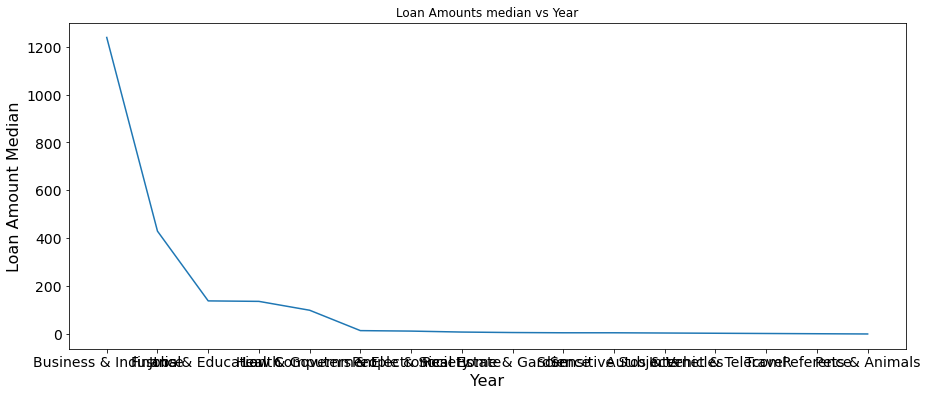

In [189]:

plt.figure(figsize = (15,6))

plt.plot(industry.category_first_from_common, industry.id)

plt.xlabel("Year", fontsize=16)
plt.ylabel("Loan Amount Median", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Loan Amounts median vs Year')

plt.show()

In [182]:
plot_(industry)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

,category_first_from_common,id
1,Business & Industrial,1238
3,Finance,430
7,Jobs & Education,139
4,Health,137
8,Law & Government,100


In [58]:
'ffeg'[:100]

'ffeg'

In [77]:
def get_closing_date(x):
    if not x: return 
    index = x.find('Closing')
    if index == -1: return
    x =  ' '.join(x[index:].split('\n')[:2])[:200]
#     print(x)
    try:
        return analyze_entities(x)
    except:
        return

In [75]:
x = df.loc[16,'file_content']
get_closing_date(x)

Closing  Date  referred  to  in  Section  3.06  (c)  of  the  Standard  Conditions  December 31,  2022.


['December 31, 2022']

In [69]:
x = df.loc[16,'file_content']
index = x.find('Closing')
x = x[index:] #.split('\n')[0]
print(x)

Closing  Date  referred  to  in  Section  3.06  (c)  of  the  Standard  Conditions 
December 31,  2022.

is

- 16-

APPENDIX

Definitions

1. 

2. 

3. 

4. 

5. 

6. 

7. 

"Adaptation  Contingency  Fund"  means the  fund  established  under  Part 3.B  of the
Project  to  provide  Sub-Project  Grants  contingent  upon  the  early  warning  of  a
the
disaster  for 
Beneficiaries'  preparedness  in  the event  that  the disaster takes  place.

implementation  of  Sub-Projects  aimed  at  increasing 

the 

"Agreed  Annual  Work  Plan"  means  the  program  of activities  agreed  each  Fiscal
Year  between  the  Recipient  and  the  World  Bank  for  implementation  under  the
.B of Schedule  2  to this  Agreement  during the
Project  in accordance  with  Section 
following Fiscal Year,  as the  same  may  be revised from  time to  time  in  accordance
with  said  Section.

the  "Guidelines  on  Preventing  and
"Anti-Corruption  Guidelines"  means 
Combating  Fraud  and  Corruption  in 

In [85]:
df['closing_date'] = df['file_content'].apply(get_closing_date)

In [167]:
def get_country(x):
    if 'United States' in x:
        x.remove('United States')
    if x:
        
        return x[0]
    else:
        return

In [168]:
df['country_first'] = df['countries'].apply(get_country)

In [169]:
df[['country_first', 'Total Amount']].groupby('country_first').count().reset_index().sort_values(by = 'Total Amount',ascending = False)

,country_first,Total Amount
25,China,328
54,Indonesia,204
53,India,200
18,Brazil,152
73,Morocco,111
...,...,...
82,Paraguay,1
51,Honduras,1
94,South Africa,1
11,Bangladesh,1


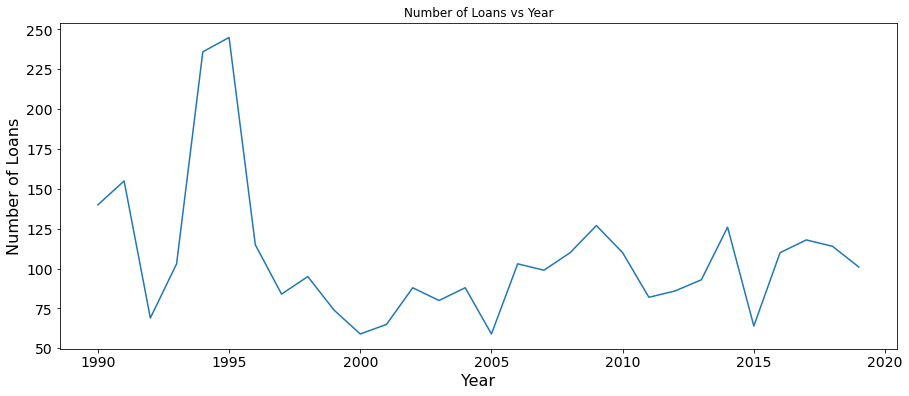

In [136]:
year_counts = df[['year', 'id']].groupby('year').count().reset_index()
plt.figure(figsize=(15,6))

plt.plot(year_counts['year'], year_counts['id'])

plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of Loans", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Number of Loans vs Year')

plt.show()

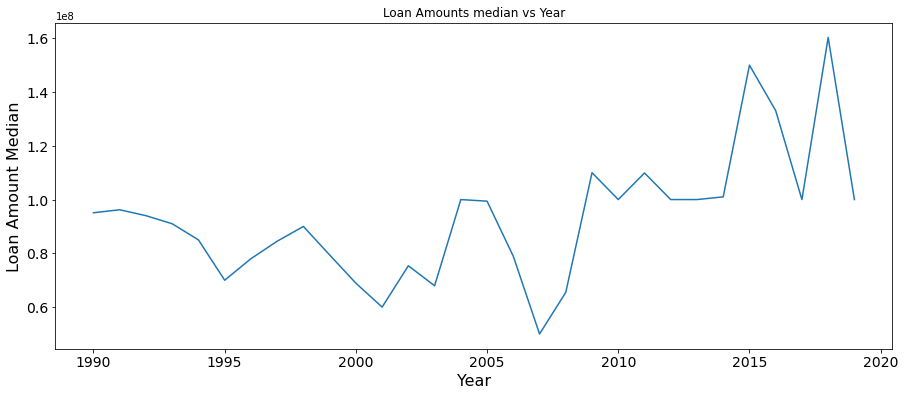

In [165]:
import numpy as np
amount_median = df[['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.figure(figsize=(15,6))

plt.plot(amount_median['year'], amount_median['Total Amount'])

plt.xlabel("Year", fontsize=16)
plt.ylabel("Loan Amount Median", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Loan Amounts median vs Year')

plt.show()

In [166]:
df.head()

,year,month,day,id,name,file_content,countries,sections,TITLE,LOAN AGREEMENT,Total Amount,Project Name,project_desc,category,top_common_40,category_from_common
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,CONFORMED COPY\n\n ...,"[Serbia, United States]","{'TITLE': (0, 506), 'LOAN AGREEMENT': (506, 25...",CONFORMED COPY\n\n ...,"LOAN AGREEMENT\n\n AGREEMENT, dated Septe...",300000000,Kolubara B Thermal Power and Lignite Mine Project,SCHEDULE 2\n\n Description ...,"[(/Business & Industrial/Energy & Utilities, 0...",serbia rehabilitation thermal monitoring progr...,"[(/Health, 0.5699999928474426), (/Business & I..."
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,"[Poland, United States]","{'TITLE': (0, 217), 'LOAN AGREEMENT': (217, 15...",CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,LOAN AGREEMENT\n\nLOAN NUMBER 7054 POL\n\nAGRE...,110000000,Railway Restructuring Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial/Business Operations, ...",borrower staff program objectives transport se...,"[(/Business & Industrial, 0.5899999737739563)]"
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"[China, United States]","{'TITLE': (0, 219), 'LOAN AGREEMENT': (219, 20...",LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"LOAN AGREEMENT AGREEMENT, dated Literal 4b , 1...",60100000,Beijing Environmental Project,None,None,None,None
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,[China],"{'TITLE': (0, 283), 'LOAN AGREEMENT': (283, 51...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,"LOAN AGREEMENT\n\nAgreement dated \n\n, 201...",150000000,Liaoning Coastal Economic Zone Urban Infras...,SCHEDULE1\n\nProject Description\n\nThe objec...,"[(/Business & Industrial/Energy & Utilities, 0...",urban rehabilitation water construction city s...,"[(/Business & Industrial/Energy & Utilities, 0..."
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"[Bosnia and Herzegovina, United States]","{'TITLE': (0, 360), 'LOAN AGREEMENT': (360, 14...",CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"LOAN AGREEMENT\n\nAGREEMENT, dated May 7, 1991...",55000000,Third Highway Sector Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial, 0.8700000047683716)]",maintenance improve highway planning including...,"[(/Business & Industrial, 0.7699999809265137)]"


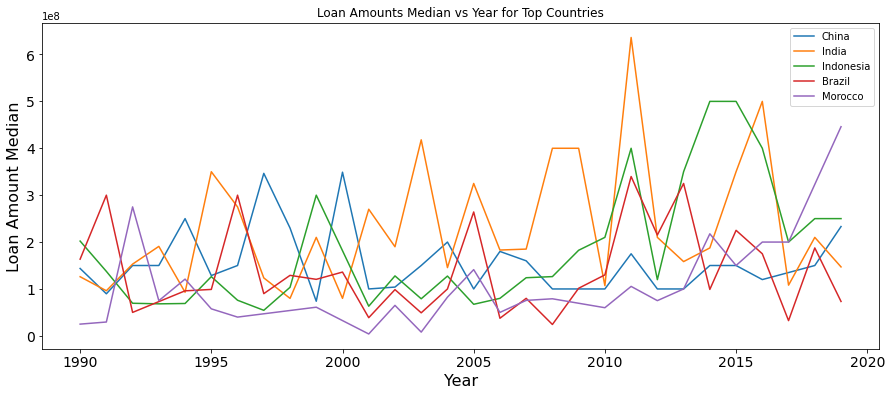

In [208]:
import numpy as np
plt.figure(figsize=(15,6))

amount_median = df[df.country_first == 'China'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'China')

amount_median = df[df.country_first == 'India'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'India')

amount_median = df[df.country_first == 'Indonesia'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Indonesia')

amount_median = df[df.country_first == 'Brazil'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Brazil')

amount_median = df[df.country_first == 'Morocco'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Morocco')

plt.xlabel("Year", fontsize=16)
plt.ylabel("Loan Amount Median", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Loan Amounts Median vs Year for Top Countries')

plt.legend()
plt.show()

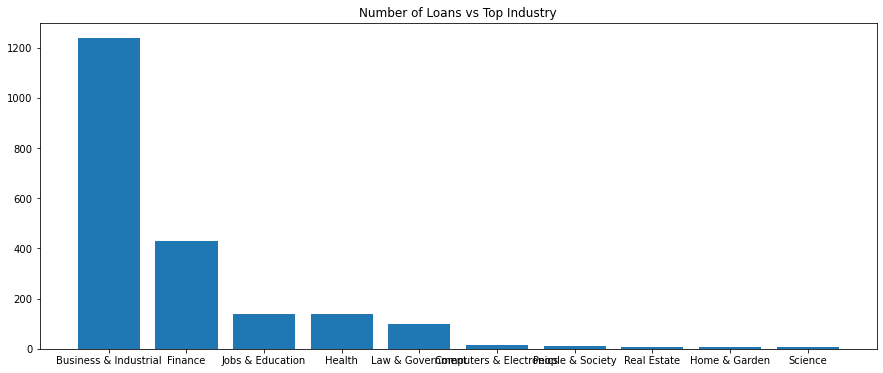

In [209]:
top_industry = df[['category_first_from_common', 'id']].groupby('category_first_from_common').count().reset_index().sort_values(by = 'id',ascending = False)[:10]
plt.figure(figsize = (15, 6))
plt.bar(top_industry.category_first_from_common, top_industry.id)
plt.title('Number of Loans vs Top Industry')
plt.show()

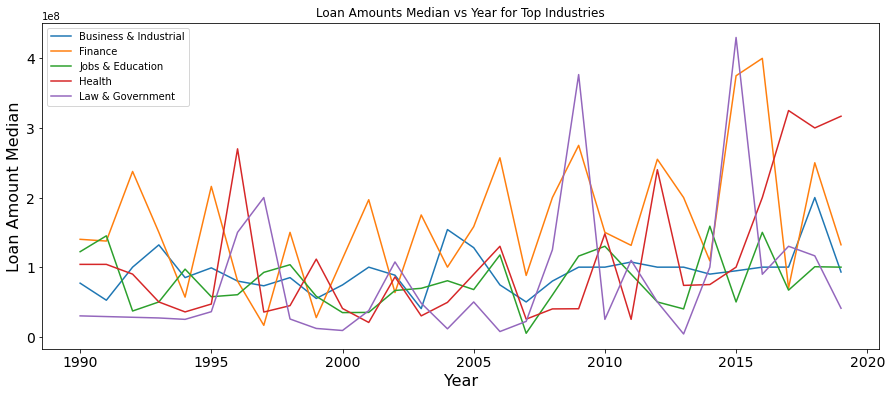

In [210]:
import numpy as np
plt.figure(figsize=(15,6))

amount_median = df[df.category_first_from_common == 'Business & Industrial'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Business & Industrial')

amount_median = df[df.category_first_from_common == 'Finance'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Finance')

amount_median = df[df.category_first_from_common == 'Jobs & Education'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Jobs & Education')

amount_median = df[df.category_first_from_common == 'Health'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Health')

amount_median = df[df.category_first_from_common == 'Law & Government'][['year', 'Total Amount']].groupby('year')['Total Amount'].apply(np.median).reset_index()
plt.plot(amount_median['year'], amount_median['Total Amount'], label = 'Law & Government')

plt.xlabel("Year", fontsize=16)
plt.ylabel("Loan Amount Median", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Loan Amounts Median vs Year for Top Industries')

plt.legend()
plt.show()

In [134]:
df = pd.read_pickle('world_bank.pickle')
df['year'] = df['year'].apply(int)
df[df.year == 2016]['Total Amount'].max()
df[df['Total Amount'] == df[df.year == 2016]['Total Amount'].max()]
df.drop(2218, inplace = True)
df.reset_index()
# df = df.reset_index()

,index,year,month,day,id,name,file_content,countries,sections,TITLE,LOAN AGREEMENT,Total Amount,Project Name,project_desc,category,top_common_40,category_from_common
0,0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,CONFORMED COPY\n\n ...,"[Serbia, United States]","{'TITLE': (0, 506), 'LOAN AGREEMENT': (506, 25...",CONFORMED COPY\n\n ...,"LOAN AGREEMENT\n\n AGREEMENT, dated Septe...",300000000,Kolubara B Thermal Power and Lignite Mine Project,SCHEDULE 2\n\n Description ...,"[(/Business & Industrial/Energy & Utilities, 0...",serbia rehabilitation thermal monitoring progr...,"[(/Health, 0.5699999928474426), (/Business & I..."
1,1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,"[Poland, United States]","{'TITLE': (0, 217), 'LOAN AGREEMENT': (217, 15...",CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,LOAN AGREEMENT\n\nLOAN NUMBER 7054 POL\n\nAGRE...,110000000,Railway Restructuring Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial/Business Operations, ...",borrower staff program objectives transport se...,"[(/Business & Industrial, 0.5899999737739563)]"
2,2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"[China, United States]","{'TITLE': (0, 219), 'LOAN AGREEMENT': (219, 20...",LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"LOAN AGREEMENT AGREEMENT, dated Literal 4b , 1...",60100000,Beijing Environmental Project,None,None,None,None
3,3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,[China],"{'TITLE': (0, 283), 'LOAN AGREEMENT': (283, 51...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,"LOAN AGREEMENT\n\nAgreement dated \n\n, 201...",150000000,Liaoning Coastal Economic Zone Urban Infras...,SCHEDULE1\n\nProject Description\n\nThe objec...,"[(/Business & Industrial/Energy & Utilities, 0...",urban rehabilitation water construction city s...,"[(/Business & Industrial/Energy & Utilities, 0..."
4,4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"[Bosnia and Herzegovina, United States]","{'TITLE': (0, 360), 'LOAN AGREEMENT': (360, 14...",CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"LOAN AGREEMENT\n\nAGREEMENT, dated May 7, 1991...",55000000,Third Highway Sector Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial, 0.8700000047683716)]",maintenance improve highway planning including...,"[(/Business & Industrial, 0.7699999809265137)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,3194,1993,october,15,268921468048527743,conformed-copy--l3642--technical-assistance-pr...,CONFORMED COPY\n\n ...,"[Kazakhstan, United States]","{'TITLE': (0, 533), 'LOAN AGREEMENT': (533, 11...",CONFORMED COPY\n\n ...,"LOAN AGREEMENT\n\n AGREEMENT, dated Octob...",38000000,Technical Assistance Project,SCHEDULE 2\n\n Description ...,"[(/Business & Industrial, 0.5799999833106995),...",development ii sector training assistance borr...,"[(/Law & Government, 0.6600000262260437)]"
3194,3195,2013,march,21,584611468237295236,official-documents-loan-agreement-for-loan-812...,"OFFICIAL \nDOC \nDOCUMENTS\n\nN, 321\nr'1 3 ...",[Chile],"{'TITLE': (0, 497), 'LOAN AGREEMENT': (497, 80...","OFFICIAL \nDOC \nDOCUMENTS\n\nN, 321\nr'1 3 ...","LOAN AGREEMENT\n\nAgreement, as of the Sig...",40000000,Tertiary Education Finance for Results Proj...,SCHEDULE 1\n\nProject Description\n\nThe obj...,"[(/Jobs & Education/Education, 0.6000000238418...",performance support tertiary education provisi...,"[(/Jobs & Education/Education, 0.7300000190734..."
3195,3196,2008,april,18,448831468262773500,"loan-agreement,-l7496-ec-conformed.txt",CONFORMED COPY \n \n\nLOAN NUMBER 7496-EC \n\n...,"[Ecuador, United States]",

In [145]:
df[df['Total Amount'] == df[df.year == 2016]['Total Amount'].max()]

,year,month,day,id,name,file_content,countries,sections,TITLE,LOAN AGREEMENT,Total Amount,Project Name,project_desc,category,top_common_40,category_from_common
1316,2016,february,26,587841468243548685,"official-documents-loan-agreement,-loan-8568-c...",LOAN NUMBER 8568-CN\n\nLoan Agreement\n\n(Ur...,"[China, United States]","{'TITLE': (0, 220), 'LOAN AGREEMENT': (220, 44...",LOAN NUMBER 8568-CN\n\nLoan Agreement\n\n(Ur...,LOAN AGREEMENT\n\nAgreement dated \n\nA 201...,650700050168996,Urumqi Urban Transport Project II,SCHEDULE 1\n\nProject Description\n\nThe obje...,[(/Business & Industrial/Transportation & Logi...,transport brt construction management public i...,None


In [147]:
doc = df.loc[1316, 'file_content']
print(doc.find('650'))

45743


In [155]:
text_content = doc[45700:] + '$3,000,000'

In [156]:
 type_ = language_v1.Document.Type.PLAIN_TEXT

# Optional. If not specified, the language is automatically detected.
# For list of supported languages:
# https://cloud.google.com/natural-language/docs/languages
language = "en"
document = {"content": text_content, "type_": type_, "language": language}

# Available values: NONE, UTF8, UTF16, UTF32
encoding_type = language_v1.EncodingType.UTF8

response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})

for entity in response.entities:
    print(entity.name, language_v1.Entity.Type(entity.type_).name)

In [178]:
df.head()

,year,month,day,id,name,file_content,countries,sections,TITLE,LOAN AGREEMENT,Total Amount,Project Name,project_desc,category,top_common_40,category_from_common,country_first
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,CONFORMED COPY\n\n ...,[Serbia],"{'TITLE': (0, 506), 'LOAN AGREEMENT': (506, 25...",CONFORMED COPY\n\n ...,"LOAN AGREEMENT\n\n AGREEMENT, dated Septe...",300000000,Kolubara B Thermal Power and Lignite Mine Project,SCHEDULE 2\n\n Description ...,"[(/Business & Industrial/Energy & Utilities, 0...",serbia rehabilitation thermal monitoring progr...,"[(/Health, 0.5699999928474426), (/Business & I...",Serbia
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,[Poland],"{'TITLE': (0, 217), 'LOAN AGREEMENT': (217, 15...",CONFORMED COPY\n\nLOAN NUMBER 7054 POL\n\nLoan...,LOAN AGREEMENT\n\nLOAN NUMBER 7054 POL\n\nAGRE...,110000000,Railway Restructuring Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial/Business Operations, ...",borrower staff program objectives transport se...,"[(/Business & Industrial, 0.5899999737739563)]",Poland
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,[China],"{'TITLE': (0, 219), 'LOAN AGREEMENT': (219, 20...",LOAN NUMBER 3415 CHA Loan Agreement (Beijing E...,"LOAN AGREEMENT AGREEMENT, dated Literal 4b , 1...",60100000,Beijing Environmental Project,None,None,None,None,China
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,[China],"{'TITLE': (0, 283), 'LOAN AGREEMENT': (283, 51...",MENTS\n\nLOAN NUMBER 8236-CN\n\nLoan Agreeme...,"LOAN AGREEMENT\n\nAgreement dated \n\n, 201...",150000000,Liaoning Coastal Economic Zone Urban Infras...,SCHEDULE1\n\nProject Description\n\nThe objec...,"[(/Business & Industrial/Energy & Utilities, 0...",urban rehabilitation water construction city s...,"[(/Business & Industrial/Energy & Utilities, 0...",China
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,[Bosnia and Herzegovina],"{'TITLE': (0, 360), 'LOAN AGREEMENT': (360, 14...",CONFORMED COPY\n\nLOAN NUMBER 3230 YU\n\nLoan ...,"LOAN AGREEMENT\n\nAGREEMENT, dated May 7, 1991...",55000000,Third Highway Sector Project,SCHEDULE 2\n\nDescription of the Project\n\nTh...,"[(/Business & Industrial, 0.8700000047683716)]",maintenance improve highway planning including...,"[(/Business & Industrial, 0.7699999809265137)]",Bosnia and Herzegovina
